# About this notebook
1. This notebook prepares GeoJSON files to match Trivedi Centre for Political Data (TCD) IDs. **To display Election Data and Capex in a Choropleth** 
2. Load GeoJSON, and Save JSON --> Excel
3. In Excel, manually add Unique identifiers for States, Districts, Parliamentary Constituency PC, Assembly AC 
4. Reload Excel and convert to JSON



In [4]:
# Project folder
proj_folder = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/"
shapefiles_raw = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/1.raw"
shapefiles_interim = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/2.interim"
shapefiles_cleaned = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/3.cleaned"

#State Input files and folders 
st_old_geo_file = "shape-files/1.raw/india_state-V2.json"
st_geo_file ="shape-files/1.raw/INDIA_STATES.geojson"
# District files and folders 
dist_old_geo_file = "shape-files/1.raw/india_2011_district-V2.json"
dist_geo_file = "shape-files/1.raw/INDIA_DISTRICTS.geojson"
# Parliament Constituency files and folders 
pc_geo_file = "shape-files/1.raw/india_2014_parliament-V2.json"
# Assembly Constituency files and folders 
ac_geo_file = "shape-files/1.raw/india_2012-17_assembly-V2.json"

print('Folder and File Names set-up')

Folder and File Names set-up


## Load JSON and Save in Excel: Run Once

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# File Name - GeoJSON file
st_file_path= os.path.join(proj_folder, st_geo_file)
dist_file_path= os.path.join(proj_folder, dist_geo_file)
pc_file_path= os.path.join(proj_folder, pc_geo_file)
ac_file_path= os.path.join(proj_folder, ac_geo_file)


# Read the GeoJSON file into a GeoDataFrame
st_gdf = gpd.read_file(st_file_path)
dist_gdf = gpd.read_file(dist_file_path)
pc_gdf = gpd.read_file(pc_file_path)
ac_gdf = gpd.read_file(ac_file_path)


# Save the unique values to an Excel file
st_gdf.to_excel(os.path.join(shapefiles_raw, 'st_geo.xlsx'), index=False)
dist_gdf.to_excel(os.path.join(shapefiles_raw, 'dist_geo.xlsx'), index=False)
pc_gdf.to_excel(os.path.join(shapefiles_raw, 'pc_geo.xlsx'), index=False)
ac_gdf.to_excel(os.path.join(shapefiles_raw, 'ac_geo.xlsx'), index=False)

print('FINITO: JSON ---> Excel')

NameError: name 'proj_folder' is not defined

DO MANUAL EDIT TO CREATE Unique Identifiers

## Load Excel. Convert Excel --> New JSON

In [45]:
import geopandas as gpd
import pandas as pd
import os
from shapely import wkt


# Function to convert WKT to Shapely geometries with error handling
def safe_wkt_loads(wkt_string):
    try:
        return wkt.loads(wkt_string)
    except WKTReadingError:
        return None
    
st_df = pd.read_excel(os.path.join(shapefiles_interim, 'st_geo.xlsx'), sheet_name='Sheet1')

# Convert the WKT strings to Shapely geometries
st_df['geometry'] = st_df['geometry'].apply(safe_wkt_loads)

st_df1 = st_df.drop(columns='geometry') 

print(st_df.columns)
print(st_df1.columns)

st_gdf = gpd.GeoDataFrame(
    st_df1,
    geometry=st_df['geometry']
)
print(st_gdf.columns)
# st_gdf.set_crs(epsg=4326, inplace=True)

st_gdf.to_file(os.path.join(shapefiles_cleaned,'india_states_cleaned.json'), driver='GeoJSON')

# # Convert DataFrame to JSON
# json_data = st_new_gdf.to_json(orient='records', indent=4)
# # print(json_data)

# # Write JSON data to a file
# path_json = 'final_result.json'
# with open(os.path.join(shapefiles_cleaned,'india_states_cleaned.json'), 'w') as json_file:
#     json_file.write(json_data)


print('FINITO: EXCEL ---> JSON')

Index(['Unnamed: 0', 'STNAME', 'STCODE11', 'STNAME_SH', 'Shape_Length',
       'Shape_Area', 'OBJECTID_1', 'OBJECTID', 'State_LGD', 'Shape_Leng',
       'MaxSimpTol', 'MinSimpTol', 'geometry'],
      dtype='object')
Index(['Unnamed: 0', 'STNAME', 'STCODE11', 'STNAME_SH', 'Shape_Length',
       'Shape_Area', 'OBJECTID_1', 'OBJECTID', 'State_LGD', 'Shape_Leng',
       'MaxSimpTol', 'MinSimpTol'],
      dtype='object')
Index(['Unnamed: 0', 'STNAME', 'STCODE11', 'STNAME_SH', 'Shape_Length',
       'Shape_Area', 'OBJECTID_1', 'OBJECTID', 'State_LGD', 'Shape_Leng',
       'MaxSimpTol', 'MinSimpTol', 'geometry'],
      dtype='object')
FINITO: EXCEL ---> JSON


0       GJ-S07
11      MP-S13
12      UP-S26
13      RJ-S21
14      KL-S12
17      UK-S27
22      OD-S19
29      KA-S11
38      CG-S05
70      HP-S09
71      MN-S15
72      JH-S10
76      DL-U04
82      CH-U02
97     DN-U03A
108     TR-S25
117     AS-S03
123     SK-S22
124     ML-S16
195     PY-U08
224     LD-U07
258     AN-U01
264     GA-S06
302     MZ-S17
398     JK-U05
426     LK-U06
451     TS-S24
452     MH-S14
454     WB-S28
456     HR-S08
457     PB-S20
458     AR-S02
459     BR-S04
486     NL-S18
677     TN-S23
728     AP-S01
Name: ST_UNIQUE_ID, dtype: object


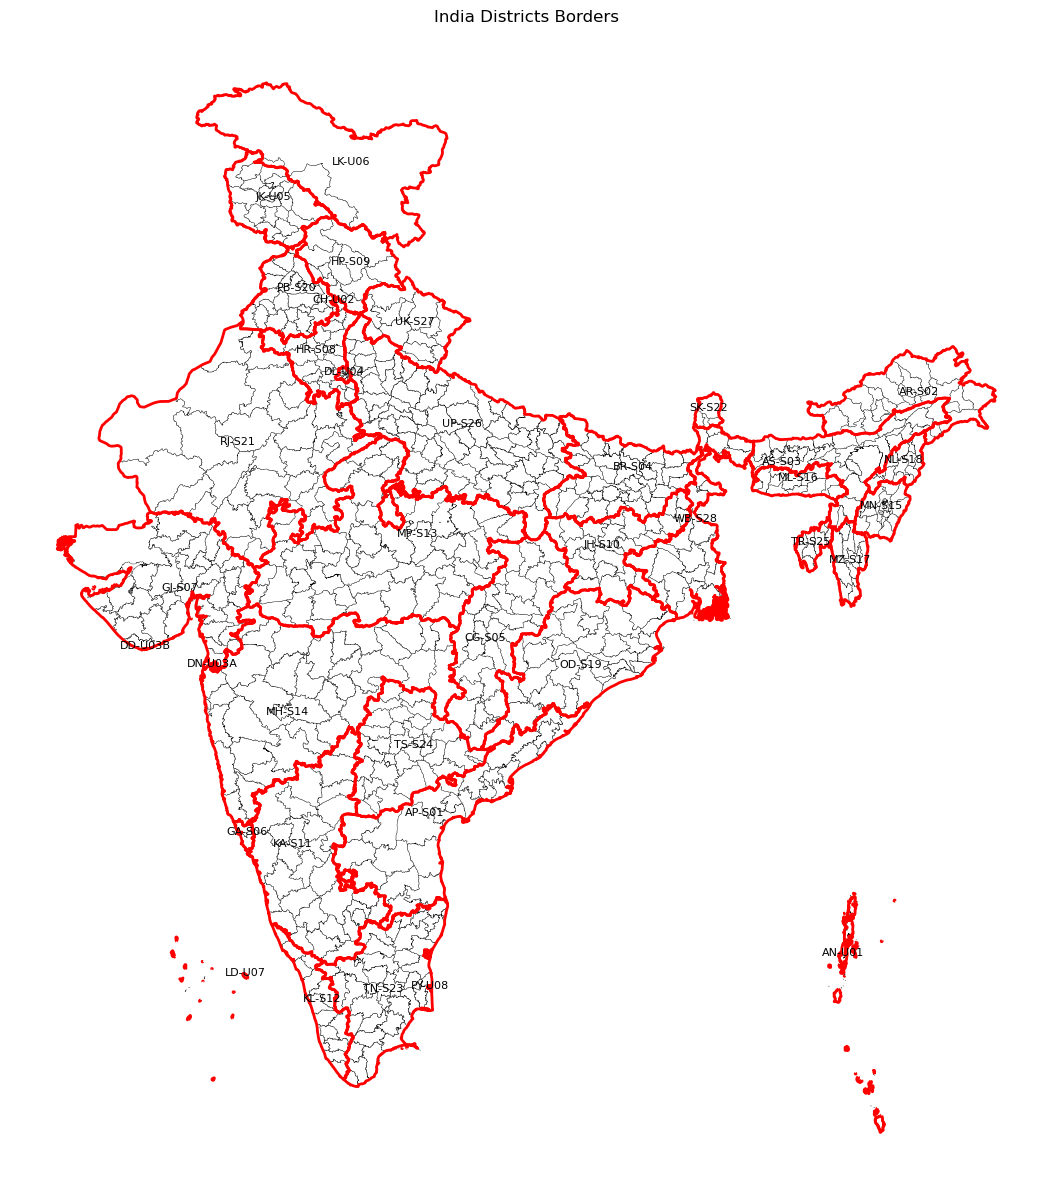

In [18]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
dist_file_path= os.path.join(proj_folder, dist_geo_file)
dist_gdf = gpd.read_file(dist_file_path)
states_gdf = gpd.read_file(st_file_path)


# # Define the list of conditions and their corresponding new values
conditions = [
{'match':'GUJARAT', 'new_value':'GJ-S07'},
{'match':'MADHYA PRADESH', 'new_value':'MP-S13'},
{'match':'UTTAR PRADESH', 'new_value':'UP-S26'},
{'match':'RAJASTHAN', 'new_value':'RJ-S21'},
{'match':'KERALA', 'new_value':'KL-S12'},
{'match':'UTTARAKHAND', 'new_value':'UK-S27'},
{'match':'ODISHA', 'new_value':'OD-S19'},
{'match':'KARNATAKA', 'new_value':'KA-S11'},
{'match':'CHHATTISGARH', 'new_value':'CG-S05'},
{'match':'HIMACHAL PRADESH', 'new_value':'HP-S09'},
{'match':'MANIPUR', 'new_value':'MN-S15'},
{'match':'JHARKHAND', 'new_value':'JH-S10'},
{'match':'DELHI', 'new_value':'DL-U04'},
{'match':'CHANDIGARH', 'new_value':'CH-U02'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DN-U03A'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DD-U03B'},
{'match':'TRIPURA', 'new_value':'TR-S25'},
{'match':'ASSAM', 'new_value':'AS-S03'},
{'match':'SIKKIM', 'new_value':'SK-S22'},
{'match':'MEGHALAYA', 'new_value':'ML-S16'},
{'match':'PUDUCHERRY', 'new_value':'PY-U08'},
{'match':'LAKSHADWEEP', 'new_value':'LD-U07'},
{'match':'ANDAMAN & NICOBAR', 'new_value':'AN-U01'},
{'match':'GOA', 'new_value':'GA-S06'},
{'match':'MIZORAM', 'new_value':'MZ-S17'},
{'match':'JAMMU & KASHMIR', 'new_value':'JK-U05'},
{'match':'LADAKH', 'new_value':'LK-U06'},
{'match':'TELANGANA', 'new_value':'TS-S24'},
{'match':'MAHARASHTRA', 'new_value':'MH-S14'},
{'match':'WEST BENGAL', 'new_value':'WB-S28'},
{'match':'HARYANA', 'new_value':'HR-S08'},
{'match':'PUNJAB', 'new_value':'PB-S20'},
{'match':'ARUNACHAL PRADESH', 'new_value':'AR-S02'},
{'match':'BIHAR', 'new_value':'BR-S04'},
{'match':'NAGALAND', 'new_value':'NL-S18'},
{'match':'TAMIL NADU', 'new_value':'TN-S23'},
{'match':'ANDHRA PRADESH', 'new_value':'AP-S01'},
]

# Add a new property 'new_property' with a default value
dist_gdf['ST_UNIQUE_ID'] = 'NA'

# Modify the new property based on the list of conditions
for idx, row in dist_gdf.iterrows():
    for condition in conditions:
        if row['stname'] == condition['match']:  # Replace 'existing_property' with the actual column name
            dist_gdf.at[idx, 'ST_UNIQUE_ID'] = condition['new_value']
            break  # Exit the loop after the first match to avoid overwriting


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, 'new.geojson')

dist_gdf.to_file(output_file_path, driver='GeoJSON')

# Read the just saved new GeoJSON file into a GeoDataFrame
dist_gdf = gpd.read_file(output_file_path)

# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Plot the districts with a thin border
# districts_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
dist_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)

# Plot the state borders with a thicker line
states_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2)

# Loop through each geometry and add text annotations for "ST_UNIQUE_ID"
for idx, row in states_gdf.iterrows():
    # Get the geometry's representative point (centroid)
    point = row.geometry.representative_point()
    
    # Use the `ax.annotate` method to add text annotations
    ax.annotate(text=row['ST_UNIQUE_ID'], xy=(point.x, point.y), horizontalalignment='center', fontsize=8)


# Remove the axis for a cleaner look
ax.axis('off')
# Set the title
plt.title('India Districts Borders')
# Display the plot
plt.show()
